# Frequency Distributions

> 

- author: Victor Omondi
- toc: true
- comments: true
- categories: [statistics]
- image:

# Libraries

In [1]:
# WARNINGS
import warnings

# MANIPULATION AND EXPLORATION
import pandas as pd
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import percentileofscore

## Libraries Configuration

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline
plt.style.use('fivethirtyeight')

# Simplifying Data

Our capacity to understand a data set just by looking at it in a table format is limited, and it decreases dramatically as the size of the data set increases. To be able to analyze data, we need to find ways to simplify it.

In [3]:
wnba = pd.read_csv('datasets/wnba.csv')
wnba

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0


The WNBA data set we've been working with has 143 rows and 32 columns. This might not seem like much compared to other data sets, but it's still extremely difficult to find any patterns just by eyeballing the data set in a table format. With 32 columns, even five rows would take us a couple of minutes to analyze.

One way to simplify this data set is to select a variable, count how many times each unique value occurs, and represent the  **frequencies**  (the number of times a unique value occurs) in a table. This is how such a table looks for the  `POS`  (player position) variable:

In [4]:
wnba.Pos.value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

Because 60 of the players in our data set play as guards, the frequency for guards is 60. Because 33 of the players are forwards, the frequency for forwards is 33, and so on.

With the table above, we simplified the  `POS`  variable by transforming it to a  *comprehensible*  format. Instead of having to deal with analyzing 143 values (the length of the  `POS`  variable), now we only have five values to analyze. We can make a few conclusions now that would have been difficult and time consuming to reach at just by looking at the list of 143 values:

* We can see how the frequencies are distributed:
  * Almost half of the players play as guards.
  * Most of the players are either guards, forwards or centers.
  * Very few players have combined positions (like guard/forward or forward/center).
* We can make comparisons with ease:
  * There are roughly two times more guards than forwards.
  * There are slightly less centers that forwards; etc.

Because the table above shows how  *frequencies*  are  *distributed* , it's often called a  **frequency distribution table** , or, shorter,  **frequency table**  or  **frequency distribution** . Throughout this mission, our focus will be on learning the details behind this form of simplifying data.

In [5]:
wnba.Height.value_counts()

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

pandas sorts the tables by default in the descending order of the frequencies. 

This default is harmless for variables measured on a nominal scale because the unique values, although different, have no direction (we can't say, for instance, that centers are  *greater*  or  *lower*  than guards). The default actually helps because we can immediately see which values have the greatest or lowest frequencies, we can make comparisons easily, etc. 

For variables measured on ordinal, interval, or ratio scales, this default makes the analysis of the tables more difficult because the unique values have direction (some uniques values are  *greater*  or  *lower*  than others).

Because the  `Height`  variable has direction, we might be interested to find:

* How many players are under 170 cm?
* How many players are very tall (over 185)?
* Are there any players below 160 cm?

In [6]:
wnba.Age.value_counts().sort_index(ascending=False)

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

The sorting techniques can't be used for ordinal scales where the measurement is done using words. 

In [7]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)
wnba.PTS_ordinal_scale.value_counts()

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64

# proportions and Percentages

When we analyze distributions, we're often interested in answering questions about  **proportions**  and  **percentages** . For instance, we may want to answer the following questions about the distribution of the  `POS`  (player position) variable:

* What  *proportion*  of players are guards?
* What  *percentage*  of players are centers?
* What  *percentage*  of players have mixed positions?

It's very difficult to answer these questions precisely just by looking at the frequencies. In pandas, we can compute all the proportions at once by dividing each frequency by the total number of players. It's slightly faster though to use  `Series.value_counts()`  with the  `normalize`  parameter set to  `True`.

In [8]:
wnba.Pos.value_counts(normalize=True)

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64

To find percentages, we just have to multiply the proportions by 100:

In [9]:
wnba.Pos.value_counts(normalize=True)*100

G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64

Because proportions and percentages are  *relative*  to the total number of instances in some set of data, they are called  **relative frequencies** . In contrast, the frequencies we've been working with so far are called  **absolute frequencies**  because they are absolute counts and don't relate to the total number of instances.

# Percentiles and Percentile Ranks

In [10]:
(wnba.Age.value_counts(normalize=True)*100).sort_index().loc[:23].sum()

18.88111888111888

The percentage of players aged 23 years or younger is 19% (rounded to the nearest integer). This percentage is also called a  **percentile rank** .

A percentile rank of a value $x$ in a frequency distribution is given by the percentage of values that are equal or less than $x$. In our last exercise, $x=23$, and the fact that 23 has a percentile rank of 19% means that  *19% of the values are equal to or less than 23* .

In this context, the value of 23 is called the 19th  **percentile** . If a value $x$ is the 19th percentile, it means that 19% of  *all*  the values in the distribution are equal to or less than $x$.

When we're trying to answer questions similar to "What percentage of players are 23 years or younger?", we're trying to find percentile ranks.

We can arrive at the same answer a bit faster using the  `percentileofscore(a, score, kind='weak')`  [function](https://docs.scipy.org/doc/scipy-0.10.0/reference/generated/scipy.stats.percentileofscore.html#scipy-stats-percentileofscore) from  `scipy.stats` :

In [11]:
percentileofscore(a=wnba.Age, score=23, kind='weak')

18.88111888111888

We need to use  `kind = 'weak'`  to indicate that we want to find the percentage of values thar are  *equal to or less*  than the value we specify in the  `score`  parameter.

## percentage of players are 30 years or older.

In [12]:
(wnba.Age.value_counts(normalize=True)*100).sort_index(ascending=False).loc[:30].sum()

26.573426573426573

We can answer this question too using percentile ranks. First we need to find the percentage of values equal to or less than 29 years (the percentile rank of 29). The rest of the values must be 30 years or more.

In [13]:
100-percentileofscore(a=wnba.Age, score=29, kind='weak')

26.573426573426573

## percentage of players played half the number of games or less in the 2016-2017 season (there are 34 games in the WNBA’s regular season)

In [14]:
percentileofscore(wnba['Games Played'], 17, kind='weak')

16.083916083916083

# Finding Percentiles with pandas

To find percentiles, we can use the  `Series.describe()`  [method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html?highlight=describe#pandas.Series.describe), which returns by default the 25th, the 50th, and the 75th percentiles:

In [15]:
wnba.Age.describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

In [16]:
wnba.Age.describe().iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64

The three percentiles that divide the distribution in  *four*  equal parts are also known as  **quartiles**  (from the Latin [ *quartus* ](http://www.latin-dictionary.net/definition/32600/quattuor-quartus) which means  *four* ). There are three quartiles in the distribution of the  `Age`  variable:

* The first quartile (also called  *lower*  quartile) is 24 (note that 24 is also the 25th percentile).
* The second quartile (also called the  *middle*  quartile) is 27 (note that 27 is also the 50th percentile).
* And the third quartile (also called the  *upper*  quartile) is 30 (note that 30 is also the 75th percentile).

We may be interested to find the percentiles for percentages other than 25%, 50%, or 75%. For that, we can use the  `percentiles`  parameter of  `Series.describe()` . This parameter requires us to pass the percentages we want as proportions between 0 and 1.

In [17]:
wnba.Age.describe(percentiles=[.1, .15, .33, .592, .85, .9]).iloc[3:]

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64

Percentiles don't have [a single standard definition](https://en.wikipedia.org/wiki/Percentile#Definitions), so don't be surprised if you get very similar (but not identical) values if you use different functions (especially if the functions come from different libraries).

In [18]:
wnba.Age.quantile(.25)

24.0

# Grouped Frequency Distribution Tables

With frequency tables, we're trying to transform relatively large and incomprehensible amounts of data to a table format we can understand. However, not all frequency tables are straightforward:

In [19]:
wnba.Weight.value_counts().sort_index()

55.0      1
57.0      1
58.0      1
59.0      2
62.0      1
63.0      3
64.0      5
65.0      4
66.0      8
67.0      1
68.0      2
69.0      2
70.0      3
71.0      2
73.0      6
74.0      4
75.0      4
76.0      4
77.0     10
78.0      5
79.0      6
80.0      3
81.0      5
82.0      4
83.0      4
84.0      9
85.0      2
86.0      7
87.0      6
88.0      6
89.0      3
90.0      2
91.0      3
93.0      3
95.0      2
96.0      2
97.0      1
104.0     2
108.0     1
113.0     2
Name: Weight, dtype: int64

There's a lot of granularity in the table above, but for this reason it's not easy to find patterns. 

If the variable is measured on an interval or ratio scale, a common solution to this problem is to  *group*  the values in equal intervals.

For the  `Weight`  variable, the values range from 55 to 113 kg, which amounts to a difference of 58 kg. We can try to segment this 58 kg interval in ten smaller and equal intervals. This will result in ten intervals of 5.8 kg each.

Fortunately, pandas can handle this process gracefully. We only need to make use of the  `bins`  parameter of  `Series.value_counts()` . We want ten equal intervals, so we need to specify  `bins = 10` :

In [20]:
wnba.Weight.value_counts(bins=10).sort_index()

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64

`(54.941, 60.8]` ,  `(60.8, 66.6]`  or  `(107.2, 113.0]`  are number intervals. The  `(`  character indicates that the starting point is not included, while the  `]`  indicates that the endpoint is included.  `(54.941, 60.8]`  means that 54.941 isn't included in the interval, while 60.8 is. The interval  `(54.941, 60.8]`  contains all real numbers greater than 54.941 and less than or equal to 60.8.

We can see above that there are 10 equal intervals, 5.8 each. The first interval,  `(54.941, 60.8]`  is confusing, and has to do with how pandas [internals](https://github.com/pandas-dev/pandas/blob/01e99decf14b55409cea0789ffcc615afed45bac/pandas/core/algorithms.py#L497) show the output. One way to understand this is to convert 54.941 to 1 decimal point like all the other values are. Then the first interval becomes  `(54.9, 60.8]` . 54.9 is not included, so you can think that the interval starts at the minimum value of the  `Weight`  variable, which is 55.

Because we  *group*  values in a  *table*  to get a better sense of  *frequencies*  in the  *distribution*, the table we generated above is also known as a  **grouped frequency distribution table**. Each group (interval) in a grouped frequency distribution table is also known as a  **class interval**.  `(107.2, 113.0]` , for instance, is a class interval.

Using the grouped frequency distribution table we generated above for the  `Weight`  variable, we can find patterns easier in the distribution of values:

* Most players weigh somewhere between 70 and 90 kg.
* Very few players weigh over 100 kg.
* Very few players weigh under 60 kg; etc.

## grouped frequency distribution table for the PTS variable

In [21]:
wnba.PTS.value_counts(bins=10, normalize=True).sort_index(ascending=False)*100

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

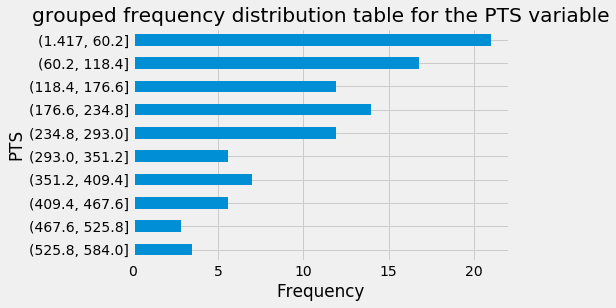

In [22]:
(wnba.PTS.value_counts(bins=10, normalize=True).sort_index(ascending=False)*100).plot.barh()
plt.title('grouped frequency distribution table for the PTS variable')
plt.xlabel('Frequency')
plt.ylabel('PTS')
plt.show()

# Information Loss

When we increase the number of class intervals, we can get more information, but the table becomes harder to analyze. When we decrease the number of class intervals, we get a boost in comprehensibility, but the amount of information in the table decreases.

# Visualizing Distributions

To find patterns in a frequency table we have to look up the frequency of each unique value or class interval and at the same time compare the frequencies. This process can get time consuming for tables with many unique values or class intervals, or when the frequency values are large and hard to compare against each other.

We can solve this problem by  **visualizing**  the data in the tables with the help of graphs. Graphs make it much easier to scan and compare frequencies, providing us with a single picture of the entire distribution of a variable.

Because they are easy to grasp and also eye-catching, graphs are a better choice over frequency tables if we need to present our findings to a non-technical audience.

we'll explore three kinds of graphs:

* Bar plots.
* Pie charts.
* Histograms.

# Bar Plots

For variables measured on a  *nominal*  or an  *ordinal*  scale it's common to use a  **bar plot**  to visualize their distribution. To generate a bar plot for the distribution of a variable we need two sets of values:

* One set containing the unique values.
* Another set containing the frequency for each unique value.

We can get this data easily from a frequency table. We can use  `Series.value_counts()`  to generate the table, and then use the  `Series.plot.bar()`  [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.bar.html) on the resulting table to generate a bar plot.

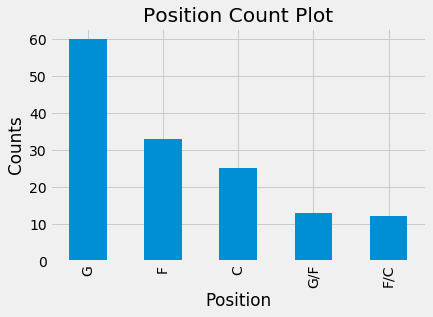

In [23]:
wnba.Pos.value_counts().plot.bar()
plt.title('Position Count Plot')
plt.xlabel('Position')
plt.ylabel('Counts')
plt.show()

The  `Series.plot.bar()`  method generates a  *vertical*  bar plot with the frequencies on the y-axis, and the unique values on the x-axis. To generate a horizontal bar plot, we can use the  `Series.plot.barh()`  [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.barh.html):

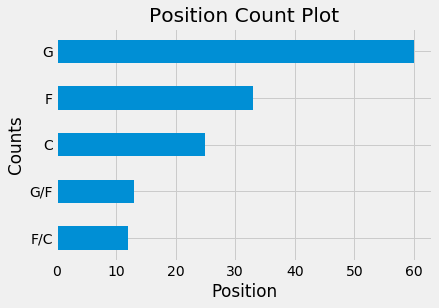

In [24]:
wnba.Pos.value_counts().sort_values().plot.barh()
plt.title('Position Count Plot')
plt.xlabel('Position')
plt.ylabel('Counts')
plt.show()

Horizontal bar plots are ideal to use when the labels of the unique values are long.

# Pie Charts

Another kind of graph we can use to visualize the distribution of  *nominal*  and  *ordinal*  variables is a  **pie chart** . Just as the name suggests, a pie chart is structured pretty much like a regular pie: it takes the form of a circle and is divided in wedges. Each wedge in a pie chart represents a category (one of the unique labels), and the size of each wedge is given by the proportion (or percentage) of that category in the distribution. We can generate pie charts using the  `Series.plot.pie()`  [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.pie.html). 

To give a pie chart the right shape, we need to specify equal values for height and width in the  `figsize`  parameter of  `Series.plot.pie()` .

The  `Pos`  is the label of a hidden y-axis, which means we can use the  `plt.ylabel()`  [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html) to remove it.

Ideally, we'd have proportions or percentages displayed on each wedge of the pie chart. Fortunately, this is easy to get using the  `autopct`  parameter. This parameter accepts Python string formatting, and we'll use the string  `'%.1f%%'`  to have percentages displayed with a precision of one decimal place. we don't have to transform to percentages ourselves using  `Series.value_counts(normalize = True) * 100` .

Other display formats are possible, and more documentation on the the syntax of string formatting in Python can be found [here](https://docs.python.org/3/library/string.html#format-specification-mini-language). Documentation on  `autopct`  and other nice customization parameters can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html).

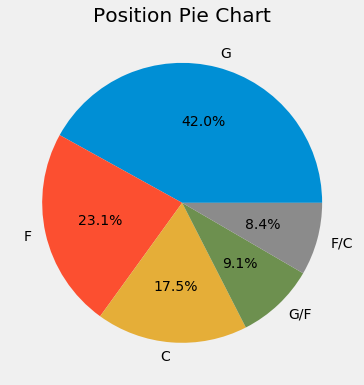

In [25]:
wnba.Pos.value_counts().plot.pie(figsize=(6,6), autopct='%.1f%%')
plt.title('Position Pie Chart')
plt.ylabel('')
plt.show()

The main advantage of pie charts over bar plots is that they provide a much better sense for the relative frequencies (proportions and percentages) in the distribution. Looking at a bar plot, we can see that categories are more or less numerous than others, but it's really hard to tell what proportion in the distribution each category takes.

With pie charts, we can immediately get a visual sense for the proportion each category takes in a distribution. Just by eyeballing the pie chart above we can make a series of observations in terms of proportions:

* Guards ("G") take about two fifths (2/5) of the distribution.
* Forwards ("F") make up roughly a quarter (1/4) of the distribution.
* Close to one fifth (1/5) of the distribution is made of centers ("C").
* Combined positions ("G/F" and "F/C") together make up roughly one fifth (1/5) of the distribution.

# Histograms

Because of the special properties of variables measured on interval and ratio scales, we can describe distributions in more elaborate ways. `PTS` (total points) variable is discrete and measured on a ratio scale.

In [26]:
wnba.PTS.describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

75% of the values are distributed within a relatively narrow interval (between 2 and 277), while the remaining 25% are distributed in an interval that's slightly larger.

To visualize the distribution of the  `PTS`  variable, we need to use a graph that allows us to see immediately the patterns outlined above. The most commonly used graph for this scenario is the  **histogram** .

To generate a histogram for the  `PTS`  variable, we can use the  `Series.plot.hist()`  [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.hist.html) directly on the  `wnba['PTS']`  column (we don't have to generate a frequency table in this case).

Each bar in the histogram corresponds to one class interval. 

While it's easy and fast to make good estimates simply by looking at a histogram, it's always a good idea to add precision to our estimates using the percentile values we get from  `Series.describe()` .

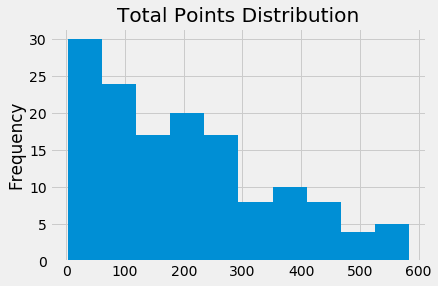

In [27]:
wnba.PTS.plot.hist()
plt.title('Total Points Distribution')
plt.show()

* The distribution of values is uneven, with each class interval having a different frequency. If the distribution was even, all the class intervals would have the same frequency.
* Most values (roughly three quarters) are clustered in the left half of the histogram.
* Most values pile up toward the starting point of the range (0 points).
* There are less and less values toward the opposite end.
* 

Under the hood, the  `wnba['PTS'].plot.hist()`  method:

* Generated a grouped frequency distribution table for the  `PTS`  variable with  *ten*  class intervals.
* For each class interval it plotted a bar with a height corresponding to the frequency of the interval.

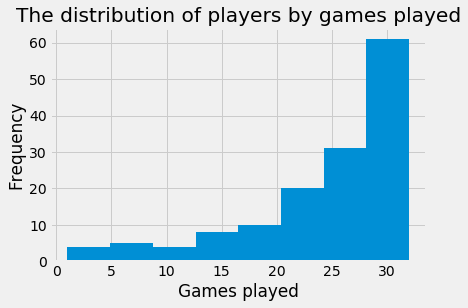

In [28]:
wnba['Games Played'].plot.hist(range=(1,32), bins=8)
plt.title('The distribution of players by games played')
plt.xlabel('Games played')
plt.show()

In the above histogram:
* It is skewed Distribution.
* Most values pile up toward the endpoint of the range (32 games played).
* There are less and less values toward the opposite end (0 games played).
* the tail points to the left, then the distribution is said to be  **left skewed** . When it points to the left, the tail points at the same time in the direction of negative numbers, and for this reason the distribution is sometimes also called  **negatively skewed** .

To modify the number of class intervals used for a histogram, we can use the  `bins`  parameter of  `Series.plot.hist()` . A bin is the same thing as a class interval, and, when it comes to histograms, the term "bin" is used much more often.

Also, we'll often want to avoid letting pandas work out the intervals, and use instead intervals that we think make more sense. We can do this in two steps:

* We start with specifying the range of the entire distribution using the  `range`  parameter of  `Series.plot.hist()` .
* Then we combine that with the number of bins to get the intervals we want.

Histogram is basically the visual form of a grouped frequency table. histogram can also be understood as a modified version of a bar plot. The main difference is that in the case of a histogram there are  *no gaps*  between bars, and each bar represents  *an interval* , not a single value.

The main reason we remove the gaps between bars in case of a histogram is that we want to show that the class intervals we plot are adjacent to one another. With the exception of the last interval, the ending point of an interval is the starting point of the next interval, and we want that to be seen on the graph.

For bar plots we add gaps because in most cases we don't know whether the unique values of  *ordinal variables*  are adjacent to one another in the same way as two class intervals are. It's safer to assume that the values are not adjacent, and add gaps.

For nominal variables, values can't be numerically adjacent in principle, and we add gaps to emphasize that the values are fundamentally distinct.

Below we summarize what we've learned so far:
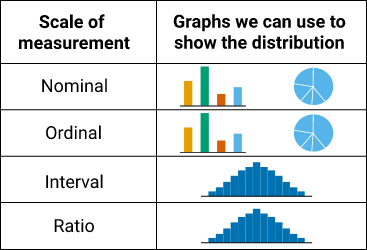

# Symmetrical Distribution

Besides skewed distributions, we often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we'll divide the histogram in two halves that are mirror images of one another.

![image.png](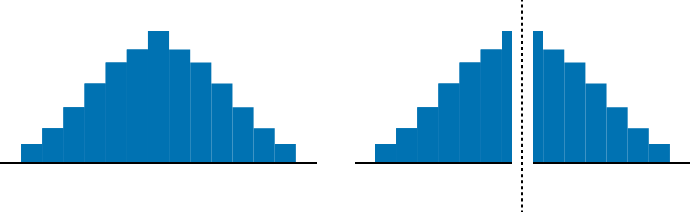 "Symmetrical Distribution")

If the shape of the histogram is symmetrical, then we say that we have a  **symmetrical distribution** .

A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a  **normal distribution**  (also called  *Gaussian distribution* ).

![image.png](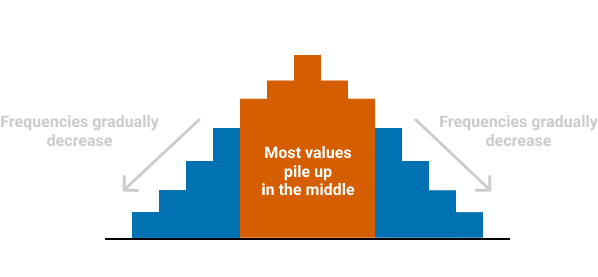 "Normal Distribution")

Another common symmetrical distribution is one where the values are distributed  *uniformly*  across the entire range. This pattern is specific to a  **uniform distribution** .

![image.png](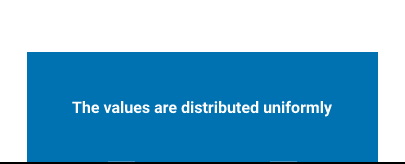 "Uniform Distribution")

In practice, we rarely see  *perfectly*  symmetrical distributions. However, it's common to use perfectly symmetrical distributions as baselines for describing the distributions we see in practice

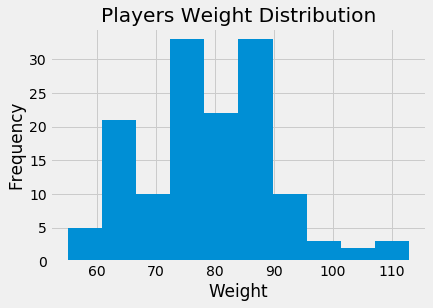

In [30]:
wnba.Weight.plot.hist(title='Players Weight Distribution')
plt.xlabel('Weight')
plt.show()

the distribution of the  `Weight`  variable as  *resembling closely*  a normal distribution. When we say that the distribution above resembles closely a normal distribution, we mean that most values pile up somewhere  *close*  to the middle and decrease in frequency  *more or less*  gradually toward both ends of the histogram.

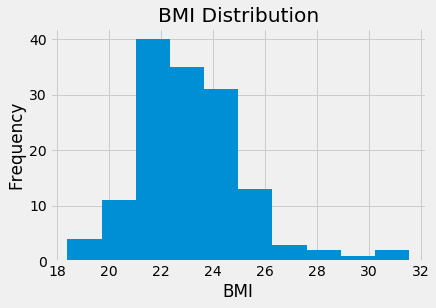

In [31]:
wnba.BMI.plot.hist(title='BMI Distribution')
plt.xlabel('BMI')
plt.show()

the distribution of the  `BMI`  variable is  *slightly*  right skewed

# Conclusion:

If a variable is measured on a nominal or ordinal scale, we can use a bar plot or a pie chart. If the variable is measured on an interval or ratio scale, then a histogram is good choice